In [1]:
!pip install finance-datareader

In [52]:
import FinanceDataReader as fdr
company = '005930'  # 삼성전자
# company = '000660' # 하이닉스
stock = fdr.DataReader(company, '1990-01-01', '2023-11-27')
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-08-11,3900,3940,3700,3710,958530,NaN
1999-08-12,3800,3860,3730,3800,740069,0.024259
1999-08-13,3699,3779,3610,3700,719845,-0.026316
1999-08-16,3680,3890,3640,3800,700220,0.027027
1999-08-17,3820,3870,3660,3680,759830,-0.031579
...,...,...,...,...,...,...
2023-11-21,73100,73400,72700,72800,9712881,0.001376
2023-11-22,72200,73000,71900,72800,11105143,0.000000
2023-11-23,73000,73200,72200,72400,6775614,-0.005495


In [53]:
import pandas as pd
import numpy as np
from tensorflow import keras

del stock['Change']
stock['Close2'] = stock['Close']  # 학습에 쓰일 Close와 타겟으로 쓰일 Close2
stock

,Open,High,Low,Close,Volume,Close2
Date,,,,,,
1999-08-11,3900,3940,3700,3710,958530,3710
1999-08-12,3800,3860,3730,3800,740069,3800
1999-08-13,3699,3779,3610,3700,719845,3700
1999-08-16,3680,3890,3640,3800,700220,3800
1999-08-17,3820,3870,3660,3680,759830,3680
...,...,...,...,...,...,...
2023-11-21,73100,73400,72700,72800,9712881,72800
2023-11-22,72200,73000,71900,72800,11105143,72800
2023-11-23,73000,73200,72200,72400,6775614,72400


In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

stock.iloc[:, 0:5] = scaler.fit_transform(stock.iloc[:, 0:5])
stock

,Open,High,Low,Close,Volume,Close2
Date,,,,,,
1999-08-11,-1.074656,-1.076789,-1.080186,-1.085173,-0.402699,3710
1999-08-12,-1.079257,-1.080441,-1.078794,-1.081029,-0.432398,3800
1999-08-13,-1.083903,-1.084138,-1.084361,-1.085633,-0.435148,3700
1999-08-16,-1.084777,-1.079071,-1.082969,-1.081029,-0.437816,3800
1999-08-17,-1.078336,-1.079984,-1.082041,-1.086554,-0.429712,3680
...,...,...,...,...,...,...
2023-11-21,2.108725,2.093669,2.121171,2.095909,0.787415,72800
2023-11-22,2.067323,2.075412,2.084054,2.095909,0.976687,72800
2023-11-23,2.104125,2.084540,2.097973,2.077492,0.388107,72400


In [55]:
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5999.0,-7.580386e-17,1.000083,-1.254066,-0.774719,-0.388297,0.770049,2.899970
High,5999.0,7.580386e-17,1.000083,-1.256628,-0.771885,-0.388472,0.773406,3.161748
Low,5999.0,-7.580386e-17,1.000083,-1.251852,-0.773969,-0.386094,0.771034,2.900632
Close,5999.0,0.000000e+00,1.000083,-1.130294,-0.773004,-0.385786,0.772185,2.933884
Volume,5999.0,7.580386e-17,1.000083,-0.533007,-0.493001,-0.464719,-0.357126,11.743714
Close2,5999.0,2.727890e+04,21720.839275,2730.000000,10490.000000,18900.000000,44050.000000,91000.000000


In [56]:
# numpy 배열로 변환
window_size = 20  # 20일치의 데이터로 그 다음날의 종가를 예측
x = []
y = []

for i in range(len(stock) - window_size):
  temp0 = stock.iloc[i:i+window_size, 0:5]
  x.append(temp0)
  temp1 = stock.iloc[i+window_size, 5]
  y.append(temp1)

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(5979, 20, 5)
(5979,)


In [57]:
print(x[0])

[[-1.07465624 -1.07678901 -1.08018551 -1.08517267 -0.40269947]
 [-1.0792565  -1.08044056 -1.07879362 -1.08102884 -0.43239827]
 [-1.08390277 -1.08413776 -1.0843612  -1.08563309 -0.43514763]
 [-1.08477682 -1.07907123 -1.0829693  -1.08102884 -0.43781556]
 [-1.07833645 -1.07998412 -1.08204137 -1.08655395 -0.42971185]
 [-1.08845703 -1.085005   -1.08760895 -1.08655395 -0.43844676]
 [-1.08293671 -1.085005   -1.08668102 -1.09207906 -0.46372121]
 [-1.09029713 -1.09413388 -1.09132067 -1.09392076 -0.46104688]
 [-1.08891705 -1.08591789 -1.08668102 -1.08563309 -0.44131453]
 [-1.0792565  -1.07957332 -1.07879362 -1.07872671 -0.42503586]
 [-1.07695637 -1.07176813 -1.07322604 -1.07228075 -0.37980257]
 [-1.06821587 -1.05807482 -1.06765846 -1.0607701  -0.33864683]
 [-1.05625519 -1.04392506 -1.05605935 -1.04971989 -0.35643775]
 [-1.04613462 -1.04575084 -1.05049177 -1.05616585 -0.41349368]
 [-1.0580953  -1.05168461 -1.05420349 -1.04971989 -0.38536723]
 [-1.04245441 -1.04301217 -1.04956384 -1.05478457 -0.32

In [58]:
print(y[0])

4760


In [59]:
begin_2023 = stock.index.get_loc('2023-01-02')
begin_2023

5776

In [60]:
split_point = begin_2023 - window_size
split_point

5756

In [62]:
x_train = x[:split_point]
y_train = y[:split_point]

x_test = x[split_point:]
y_test = y[split_point:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5756, 20, 5) (5756,)
(223, 20, 5) (223,)


In [63]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4604, 20, 5) (4604,)
(1152, 20, 5) (1152,)


In [64]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint('stock1.h5', monitor='val_mae', mode='min', save_best_only=True, verbose=1)
ea = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [65]:
model = Sequential()
model.add(LSTM(32, activation='tanh', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam', metrics='mae')

history = model.fit(x_train, y_train, epochs=300, callbacks=[mc, ea], validation_data=(x_val, y_val))

Epoch 1/300
144/144 [==============================] - ETA: 0s - loss: 25772.2129 - mae: 25772.2129
Epoch 1: val_mae improved from inf to 25477.04688, saving model to stock1.h5
144/144 [==============================] - 5s 17ms/step - loss: 25772.2129 - mae: 25772.2129 - val_loss: 25477.0469 - val_mae: 25477.0469
Epoch 2/300
 11/144 [=>............................] - ETA: 1s - loss: 27846.7500 - mae: 27846.7500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


143/144 [============================>.] - ETA: 0s - loss: 24170.9453 - mae: 24170.9453
Epoch 2: val_mae improved from 25477.04688 to 21966.98047, saving model to stock1.h5
144/144 [==============================] - 2s 15ms/step - loss: 24161.6543 - mae: 24161.6543 - val_loss: 21966.9805 - val_mae: 21966.9805
Epoch 3/300
143/144 [============================>.] - ETA: 0s - loss: 19249.3125 - mae: 19249.3125
Epoch 3: val_mae improved from 21966.98047 to 16941.66992, saving model to stock1.h5
144/144 [==============================] - 3s 20ms/step - loss: 19218.7227 - mae: 19218.7227 - val_loss: 16941.6699 - val_mae: 16941.6699
Epoch 4/300
144/144 [==============================] - ETA: 0s - loss: 16295.1279 - mae: 16295.1279
Epoch 4: val_mae improved from 16941.66992 to 16171.01953, saving model to stock1.h5
144/144 [==============================] - 2s 14ms/step - loss: 16295.1279 - mae: 16295.1279 - val_loss: 16171.0195 - val_mae: 16171.0195
Epoch 5/300
144/144 [======================

In [66]:
model = load_model('stock1.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])

Test Loss: 836.0234985351562


7/7 [==============================] - 0s 5ms/step


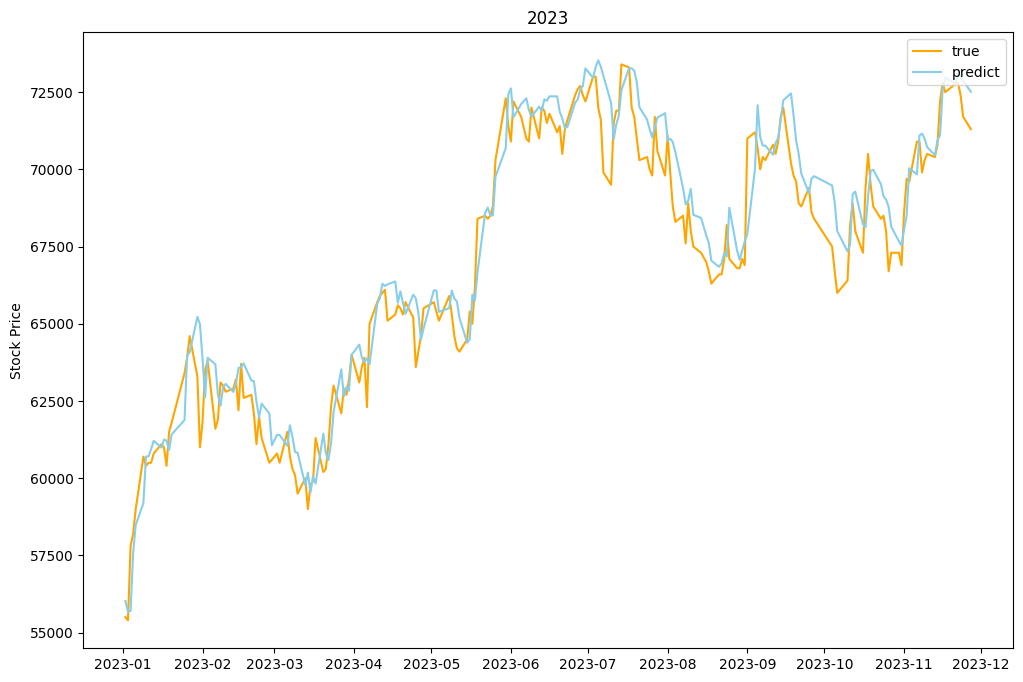

In [67]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
days_2023 = stock.index[stock.index>='2023-01-02']

plt.figure(figsize=(12, 8))
plt.title('2023')
plt.plot(days_2023, y_test, 'orange', label='true')
plt.plot(days_2023, y_pred, 'skyblue', label='predict')
plt.ylabel('Stock Price')
plt.legend(loc='upper right')
plt.show()